In [1]:
from sympy import *
import numpy as np
init_printing(use_unicode = True)
%load_ext rpy2.ipython 

In [2]:
%%R
source("functionsGenerateEdgeForPy.R")

In [2]:
n, mu1, mu2, mu3, mu4, mu5, mu6, mu7, m2, m3, m4, m5, m6, X_i, X_j, X_k, Xbar = var('n, mu1, mu2, mu3, mu4, mu5, mu6, mu7, m2, m3, m4, m5, m6, X_i, X_j, X_k, Xbar')

In [3]:
m_x2, m_x3, m_x4, m_x5, m_x6, m_y2, m_y3, m_y4, m_y5, m_y6, n_x, n_y, Y_i, Y_j, Y_bar = var('m_x2, m_x3, m_x4, m_x5, m_x6, m_y2, m_y3, m_y4, m_y5, m_y6, n_x, n_y, Y_i, Y_j, Y_bar')
Xbar2, Xbar3, Xbar4, Xbar5, Xbar6, Ybar, Ybar2, Ybar3, Ybar4, Ybar5, Ybar6 = var('Xbar2, Xbar3, Xbar4, Xbar5, Xbar6, Ybar, Ybar2, Ybar3, Ybar4, Ybar5, Ybar6')

In [4]:
#********************* 2nd moment ************************#

In [4]:
Em2 = mu2*(n - 1)/n

In [6]:
#********************* 3rd moment ************************#

In [5]:
# m3 biased (X_i - X_bar)**3

In [6]:
%%R
### for E(m3):
paste(one_combination(c(0, 0, 1)), " - 3*", one_combination(c(1, 1)), " + 2*", one_combination(3), sep = "")
# note that parentheses are not needed here (but in general should be inserted for safety)

[1] " (1*n*mu3**1 ) / n**1 - 3* (1*n*mu3**1 ) / n**2 + 2* (1*n*mu3**1 ) / n**3"


In [5]:
# E(m3) 
Em3 = (1*n*mu3**1 ) / n**1 - 3* (1*n*mu3**1 ) / n**2 + 2* (1*n*mu3**1 ) / n**3
eq1 = -m3 + Em3

In [6]:
# solve for mu3

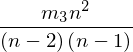

In [7]:
sol = solve(eq1, mu3)
# Unbiased estimate of mu3
sol[0].factor()

In [8]:
# two-sample #

In [9]:
eq1xy = -m3 + (Em3.subs({n: n_x})*n_x + (Em3.subs({n: n_y}))*n_y)/(n_x + n_y) 

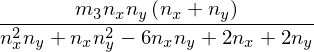

In [10]:
sol = solve(eq1xy, mu3)
M3two = sol[0].expand().factor()
M3two

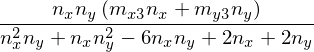

In [11]:
M3two.subs(m3, (n_x*m_x3 + n_y*m_y3)/(n_x + n_y))

In [12]:
print(M3two)

m3*n_x*n_y*(n_x + n_y)/(n_x**2*n_y + n_x*n_y**2 - 6*n_x*n_y + 2*n_x + 2*n_y)


In [13]:
#********************* 4th moment ************************#

In [22]:
# m4    biased (X_i - X_bar)**4
# m2**2 biased
((X_i - Xbar)**2*(X_j - Xbar)**2).expand()

In [86]:
%%capture
%%R
### for E(m4):
paste(one_combination(c(0, 0, 0, 1)), " - 4*", one_combination(c(1, 0, 1)), " + 6*", one_combination(c(2, 1)), 
      " - 3*", one_combination(4), sep = "")

In [87]:
%%capture
%%R
### for E(m2**2):
paste(one_combination(c(0, 2)), " - 2*", one_combination(c(2, 1)), " + ", one_combination(4), sep = "")

In [88]:
# solve system of equations for mu4 and mu2**2

In [14]:
# E(m4)
Em4 = (1*n*mu4**1 ) / n**1 - 4* (1*n*mu4**1 ) / n**2 + 6* (1*n*(n-1)*mu2**2 + 1*n*mu4**1 ) / n**3 - 3* (3*n*(n-1)*mu2**2 + 1*n*mu4**1 ) / n**4
eq1 = -m4 + Em4
# E(m2**2)
Em2pow2 = (1*n*(n-1)*mu2**2 + 1*n*mu4**1 ) / n**2 - 2* (1*n*(n-1)*mu2**2 + 1*n*mu4**1 ) / n**3 +  (3*n*(n-1)*mu2**2 + 1*n*mu4**1 ) / n**4
# equations
eq1 = -m4 + Em4
eq2 = -m2**2 + Em2pow2

In [15]:
sol = solve([eq1, eq2], mu4, mu2)  # list
M4 = sol[0][0]
M2pow2 = (sol[0][1]**2)

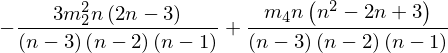

In [16]:
# Unbiased estimate of mu4
sum(list(map(factor, M4.expand().collect(m4).collect(m2).args)))

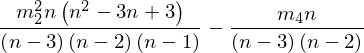

In [17]:
# Unbiased estimate of mu2**2
sum(list(map(factor, M2pow2.expand().collect(m4).collect(m2).args)))

In [18]:
# two-sample #

In [19]:
m2pow2 = ((n_x*m_x2 + n_y*m_y2)**2).expand()

In [20]:
eq1xy = -m4 + (Em4.subs({n: n_x})*n_x + Em4.subs({n: n_y})*n_y)/(n_x + n_y) 
eq2xy = -m2**2 + (m2pow2.coeff(m_x2**2)*Em2pow2.subs(n, n_x) + m2pow2.coeff(m_y2**2)*Em2pow2.subs(n, n_y) + m2pow2.coeff(m_x2*m_y2)*Em2.subs(n, n_x)*Em2.subs(n, n_y))/(n_x + n_y)**2 

In [21]:
sol = solve([eq1xy, eq2xy], [mu4, mu2**2])  # dictionary
M4two = sol[mu4]
M2pow2two = sol[mu2**2]

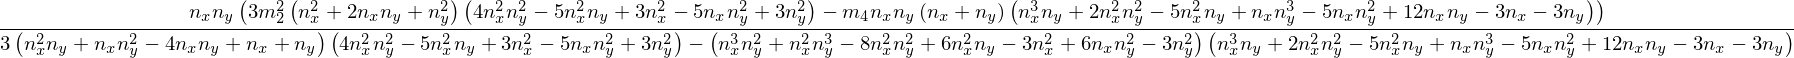

In [22]:
M4two#.factor()

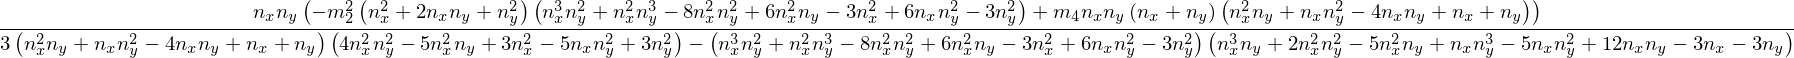

In [22]:
M2pow2two

In [23]:
print(M4two)

n_x*n_y*(3*m2**2*(n_x**2 + 2*n_x*n_y + n_y**2)*(4*n_x**2*n_y**2 - 5*n_x**2*n_y + 3*n_x**2 - 5*n_x*n_y**2 + 3*n_y**2) - m4*n_x*n_y*(n_x + n_y)*(n_x**3*n_y + 2*n_x**2*n_y**2 - 5*n_x**2*n_y + n_x*n_y**3 - 5*n_x*n_y**2 + 12*n_x*n_y - 3*n_x - 3*n_y))/(3*(n_x**2*n_y + n_x*n_y**2 - 4*n_x*n_y + n_x + n_y)*(4*n_x**2*n_y**2 - 5*n_x**2*n_y + 3*n_x**2 - 5*n_x*n_y**2 + 3*n_y**2) - (n_x**3*n_y**2 + n_x**2*n_y**3 - 8*n_x**2*n_y**2 + 6*n_x**2*n_y - 3*n_x**2 + 6*n_x*n_y**2 - 3*n_y**2)*(n_x**3*n_y + 2*n_x**2*n_y**2 - 5*n_x**2*n_y + n_x*n_y**3 - 5*n_x*n_y**2 + 12*n_x*n_y - 3*n_x - 3*n_y))


In [24]:
print(M2pow2two)

n_x*n_y*(-m2**2*(n_x**2 + 2*n_x*n_y + n_y**2)*(n_x**3*n_y**2 + n_x**2*n_y**3 - 8*n_x**2*n_y**2 + 6*n_x**2*n_y - 3*n_x**2 + 6*n_x*n_y**2 - 3*n_y**2) + m4*n_x*n_y*(n_x + n_y)*(n_x**2*n_y + n_x*n_y**2 - 4*n_x*n_y + n_x + n_y))/(3*(n_x**2*n_y + n_x*n_y**2 - 4*n_x*n_y + n_x + n_y)*(4*n_x**2*n_y**2 - 5*n_x**2*n_y + 3*n_x**2 - 5*n_x*n_y**2 + 3*n_y**2) - (n_x**3*n_y**2 + n_x**2*n_y**3 - 8*n_x**2*n_y**2 + 6*n_x**2*n_y - 3*n_x**2 + 6*n_x*n_y**2 - 3*n_y**2)*(n_x**3*n_y + 2*n_x**2*n_y**2 - 5*n_x**2*n_y + n_x*n_y**3 - 5*n_x*n_y**2 + 12*n_x*n_y - 3*n_x - 3*n_y))


In [19]:
#********************* 5th moment ************************#

In [123]:
# m5    biased (X_i - X_bar)**5
# m2*m3 biased
((X_i - Xbar)**2*(X_j - Xbar)**3).expand()

In [21]:
%%capture
%%R
### for E(m5):
paste(one_combination(c(rep(0, 4), 1)), " - 5*", one_combination(c(1, 0, 0, 1)), " + 10*", 
      one_combination(c(2, 0, 1)), " - 10*", one_combination(c(3, 1)), " + 4*", one_combination(5), sep = "")

In [22]:
%%capture
%%R
### for E(m2*m3):
paste(one_combination(c(0, 1, 1)), " - ", one_combination(c(2, 0, 1)), " - 3*", one_combination(c(1, 2)), " + 5*",
      one_combination(c(3, 1)), " - 2*", one_combination(5), sep = "")

In [23]:
# solve system of equations for mu5 and mu2*mu3

In [23]:
# E(m5)
Em5 = (1*n*mu5**1 ) / n**1 - 5* (1*n*mu5**1 ) / n**2 + 10* (1*n*(n-1)*mu3**1*mu2**1 + 1*n*mu5**1 ) / n**3 - 10* (4*n*(n-1)*mu3**1*mu2**1 + 1*n*mu5**1 ) / n**4 + 4* (10*n*(n-1)*mu3**1*mu2**1 +  1*n*mu5**1 ) / n**5
eq1 = -m5 + Em5
# E(m2*m3)
Em2m3 = (1*n*(n-1)*mu3**1*mu2**1 + 1*n*mu5**1 ) / n**2 -  (1*n*(n-1)*mu3**1*mu2**1 + 1*n*mu5**1 ) / n**3 - 3* (2*n*(n-1)*mu3**1*mu2**1 + 1*n*mu5**1 ) / n**3 + 5* (4*n*(n-1)*mu3**1*mu2**1 + 1*n*mu5**1 ) / n**4 - 2* (10*n*(n-1)*mu3**1*mu2**1 +  1*n*mu5**1 ) / n**5
# equations
eq1 = -m5 + Em5
eq2 = -m2*m3 + Em2m3

In [24]:
sol = solve([eq1, eq2], [mu5, mu2*mu3])  # dictionary
M5 = sol[mu5]
M2M3 = sol[mu2*mu3]

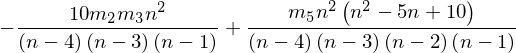

In [25]:
# Unbiased estimate of mu5
sum(list(map(factor, M5.expand().collect(m5).collect(m2*m3).args)))

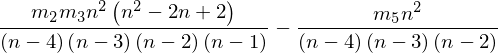

In [26]:
# Unbiased estimate of mu2*mu3
sum(list(map(factor, M2M3.expand().collect(m5).collect(m2*m3).args)))

In [27]:
# two-sample #

In [28]:
m2m3 = ((n_x*m_x2 + n_y*m_y2)*(n_x*m_x3 + n_y*m_y3)).expand()
m2m3

In [29]:
eq1xy = -m5 + (Em5.subs({n: n_x})*n_x + Em5.subs({n: n_y})*n_y)/(n_x + n_y) 
eq2xy = -m2*m3 + (m2m3.coeff(m_x2*m_x3)*Em2m3.subs(n, n_x) + m2m3.coeff(m_y2*m_y3)*Em2m3.subs(n, n_y) + m2m3.coeff(m_x3*m_y2)*Em3.subs(n, n_x)*Em2.subs(n, n_y) + m2m3.coeff(m_x2*m_y3)*Em2.subs(n, n_x)*Em3.subs(n, n_y))    /(n_x + n_y)**2 

In [30]:
sol = solve([eq1xy.simplify(), eq2xy.simplify()], mu5, mu2*mu3)  # dictionary
M5two = sol[mu5]
M2M3two = sol[mu2*mu3]

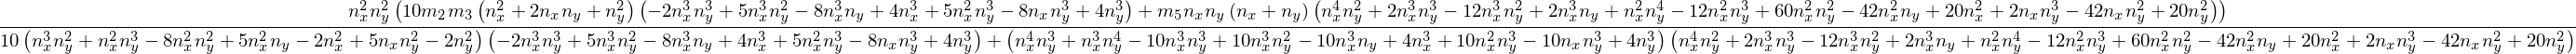

In [31]:
M5two

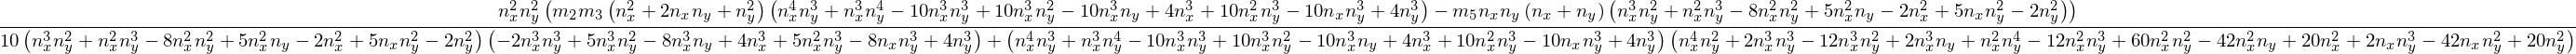

In [34]:
M2M3two

In [35]:
print(M5two)

n_x**2*n_y**2*(10*m2*m3*(n_x**2 + 2*n_x*n_y + n_y**2)*(-2*n_x**3*n_y**3 + 5*n_x**3*n_y**2 - 8*n_x**3*n_y + 4*n_x**3 + 5*n_x**2*n_y**3 - 8*n_x*n_y**3 + 4*n_y**3) + m5*n_x*n_y*(n_x + n_y)*(n_x**4*n_y**2 + 2*n_x**3*n_y**3 - 12*n_x**3*n_y**2 + 2*n_x**3*n_y + n_x**2*n_y**4 - 12*n_x**2*n_y**3 + 60*n_x**2*n_y**2 - 42*n_x**2*n_y + 20*n_x**2 + 2*n_x*n_y**3 - 42*n_x*n_y**2 + 20*n_y**2))/(10*(n_x**3*n_y**2 + n_x**2*n_y**3 - 8*n_x**2*n_y**2 + 5*n_x**2*n_y - 2*n_x**2 + 5*n_x*n_y**2 - 2*n_y**2)*(-2*n_x**3*n_y**3 + 5*n_x**3*n_y**2 - 8*n_x**3*n_y + 4*n_x**3 + 5*n_x**2*n_y**3 - 8*n_x*n_y**3 + 4*n_y**3) + (n_x**4*n_y**3 + n_x**3*n_y**4 - 10*n_x**3*n_y**3 + 10*n_x**3*n_y**2 - 10*n_x**3*n_y + 4*n_x**3 + 10*n_x**2*n_y**3 - 10*n_x*n_y**3 + 4*n_y**3)*(n_x**4*n_y**2 + 2*n_x**3*n_y**3 - 12*n_x**3*n_y**2 + 2*n_x**3*n_y + n_x**2*n_y**4 - 12*n_x**2*n_y**3 + 60*n_x**2*n_y**2 - 42*n_x**2*n_y + 20*n_x**2 + 2*n_x*n_y**3 - 42*n_x*n_y**2 + 20*n_y**2))


In [36]:
print(M2M3two)

n_x**2*n_y**2*(m2*m3*(n_x**2 + 2*n_x*n_y + n_y**2)*(n_x**4*n_y**3 + n_x**3*n_y**4 - 10*n_x**3*n_y**3 + 10*n_x**3*n_y**2 - 10*n_x**3*n_y + 4*n_x**3 + 10*n_x**2*n_y**3 - 10*n_x*n_y**3 + 4*n_y**3) - m5*n_x*n_y*(n_x + n_y)*(n_x**3*n_y**2 + n_x**2*n_y**3 - 8*n_x**2*n_y**2 + 5*n_x**2*n_y - 2*n_x**2 + 5*n_x*n_y**2 - 2*n_y**2))/(10*(n_x**3*n_y**2 + n_x**2*n_y**3 - 8*n_x**2*n_y**2 + 5*n_x**2*n_y - 2*n_x**2 + 5*n_x*n_y**2 - 2*n_y**2)*(-2*n_x**3*n_y**3 + 5*n_x**3*n_y**2 - 8*n_x**3*n_y + 4*n_x**3 + 5*n_x**2*n_y**3 - 8*n_x*n_y**3 + 4*n_y**3) + (n_x**4*n_y**3 + n_x**3*n_y**4 - 10*n_x**3*n_y**3 + 10*n_x**3*n_y**2 - 10*n_x**3*n_y + 4*n_x**3 + 10*n_x**2*n_y**3 - 10*n_x*n_y**3 + 4*n_y**3)*(n_x**4*n_y**2 + 2*n_x**3*n_y**3 - 12*n_x**3*n_y**2 + 2*n_x**3*n_y + n_x**2*n_y**4 - 12*n_x**2*n_y**3 + 60*n_x**2*n_y**2 - 42*n_x**2*n_y + 20*n_x**2 + 2*n_x*n_y**3 - 42*n_x*n_y**2 + 20*n_y**2))


In [28]:
#********************* 6th moment ************************#

In [215]:
# m6    biased (X_i - X_bar)**6
# m2*m4 biased
((X_i - Xbar)**2*(X_j - Xbar)**4).expand()

In [216]:
# m3**2 biased
((X_i - Xbar)**3*(X_j - Xbar)**3).expand()

In [217]:
# m2**3 biased
((X_i - Xbar)**2*(X_j - Xbar)**2*(X_k - Xbar)**2).expand()

In [32]:
%%capture
%%R
### for E(m6):
paste(one_combination(c(rep(0, 5), 1)), " - 6*", one_combination(c(1, 0, 0, 0, 1)), " + 15*", 
      one_combination(c(2, 0, 0, 1)), " - 20*", one_combination(c(3, 0, 1)), " + 15*", one_combination(c(4, 1)), 
      " - 5*", one_combination(6), sep = "")

In [33]:
%%capture
%%R
### for E(m2*m4):
paste(one_combination(c(0, 1, 0, 1)), " - ", one_combination(c(2, 0, 0, 1)), " - 4*", one_combination(c(1, 1, 1)), 
      " + 4*", one_combination(c(3, 0, 1)), " + 6*", one_combination(c(2, 2)), " - 9*", one_combination(c(4, 1)), 
      " + 3*", one_combination(6), sep = "")

In [34]:
%%capture
%%R
### for E(m3**2):
paste(one_combination(c(0, 0, 2)), " - 6*", one_combination(c(1, 1, 1)), " + 4*", one_combination(c(3, 0, 1)), 
      " + 9*", one_combination(c(2, 2)), " - 12*", one_combination(c(4, 1)), " + 4*", one_combination(6), sep = "")

In [35]:
%%capture
%%R
### for E(m2**3):
paste(one_combination(c(0, 3)), " - 3*", one_combination(c(2, 2)), " + 3*", one_combination(c(4, 1)), " - ",
      one_combination(6), sep = "")  

In [36]:
# solve system of equations for mu6, mu2*mu4, mu3**2, mu2**3

In [32]:
# E(m6):
Em6 = (1*n*mu6**1 ) / n**1 - 6* (1*n*mu6**1 ) / n**2 + 15* (1*n*(n-1)*mu4**1*mu2**1 + 1*n*mu6**1 ) / n**3 - 20* (3*n*(n-1)*mu4**1*mu2**1 + 1*n*(n-1)*mu3**2 + 1*n*mu6**1 ) / n**4 + 15* (3*n*(n-1)*(n-2)*mu2**3 + 7*n*(n-1)*mu4**1*mu2**1 + 4*n*(n-1)*mu3**2 + 1*n*mu6**1 ) / n**5 - 5* (15*n*(n-1)*(n-2)*mu2**3 + 15*n*(n-1)*mu4**1*mu2**1 + 10*n*(n-1)*mu3**2 +  1*n*mu6**1 ) / n**6
# E(m2*m3):
Em2m4 = (1*n*(n-1)*mu4**1*mu2**1 + 1*n*mu6**1 ) / n**2 -  (1*n*(n-1)*mu4**1*mu2**1 + 1*n*mu6**1 ) / n**3 - 4* (1*n*(n-1)*mu4**1*mu2**1 + 1*n*(n-1)*mu3**2 + 1*n*mu6**1 ) / n**3 + 4* (3*n*(n-1)*mu4**1*mu2**1 + 1*n*(n-1)*mu3**2 + 1*n*mu6**1 ) / n**4 + 6* (1*n*(n-1)*(n-2)*mu2**3 + 3*n*(n-1)*mu4**1*mu2**1 + 2*n*(n-1)*mu3**2 + 1*n*mu6**1 ) / n**4 - 9* (3*n*(n-1)*(n-2)*mu2**3 + 7*n*(n-1)*mu4**1*mu2**1 + 4*n*(n-1)*mu3**2 + 1*n*mu6**1 ) / n**5 + 3* (15*n*(n-1)*(n-2)*mu2**3 + 15*n*(n-1)*mu4**1*mu2**1 + 10*n*(n-1)*mu3**2 +  1*n*mu6**1 ) / n**6
# E(m3**2)
Em3pow2 = (1*n*(n-1)*mu3**2 + 1*n*mu6**1 ) / n**2 - 6* (1*n*(n-1)*mu4**1*mu2**1 + 1*n*(n-1)*mu3**2 + 1*n*mu6**1 ) / n**3 + 4* (3*n*(n-1)*mu4**1*mu2**1 + 1*n*(n-1)*mu3**2 + 1*n*mu6**1 ) / n**4 + 9* (1*n*(n-1)*(n-2)*mu2**3 + 3*n*(n-1)*mu4**1*mu2**1 + 2*n*(n-1)*mu3**2 + 1*n*mu6**1 ) / n**4 - 12* (3*n*(n-1)*(n-2)*mu2**3 + 7*n*(n-1)*mu4**1*mu2**1 + 4*n*(n-1)*mu3**2 + 1*n*mu6**1 ) / n**5 + 4* (15*n*(n-1)*(n-2)*mu2**3 + 15*n*(n-1)*mu4**1*mu2**1 + 10*n*(n-1)*mu3**2 +  1*n*mu6**1 ) / n**6
# E(m2**3)
Em2pow3 = (1*n*(n-1)*(n-2)*mu2**3 + 3*n*(n-1)*mu4**1*mu2**1 + 1*n*mu6**1 ) / n**3 - 3* (1*n*(n-1)*(n-2)*mu2**3 + 3*n*(n-1)*mu4**1*mu2**1 + 2*n*(n-1)*mu3**2 + 1*n*mu6**1 ) / n**4 + 3* (3*n*(n-1)*(n-2)*mu2**3 + 7*n*(n-1)*mu4**1*mu2**1 + 4*n*(n-1)*mu3**2 + 1*n*mu6**1 ) / n**5 -  (15*n*(n-1)*(n-2)*mu2**3 + 15*n*(n-1)*mu4**1*mu2**1 + 10*n*(n-1)*mu3**2 +  1*n*mu6**1 ) / n**6

# equations
eq1 = -m6    + Em6
eq2 = -m2*m4 + Em2m4
eq3 = -m3**2 + Em3pow2
eq4 = -m2**3 + Em2pow3

In [33]:
sol = solve([eq1, eq2, eq3, eq4], mu6, mu2*mu4, mu3**2, mu2**3)
M6 = sol[mu6]
M2M4 = sol[mu2*mu4]
M3pow2 = sol[mu3**2]
M2pow3 = sol[mu2**3]

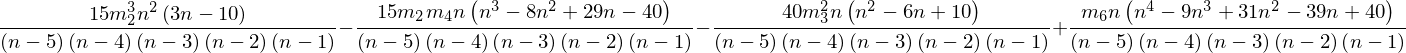

In [36]:
# Unbiased estimate of mu6
sum(list(map(factor, M6.expand().collect(m6).collect(m2*m4).collect(m3**2).collect(m2**3).args)))

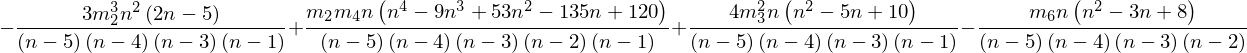

In [37]:
# Unbiased estimate of mu2*mu4
sum(list(map(factor, M2M4.expand().collect(m6).collect(m2*m4).collect(m3**2).collect(m2**3).args)))

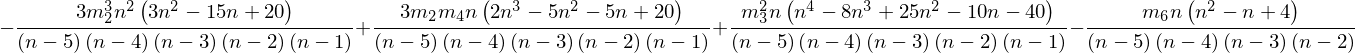

In [38]:
# Unbiased estimate of mu3**2
sum(list(map(factor, M3pow2.expand().collect(m6).collect(m2*m4).collect(m3**2).collect(m2**3).args)))

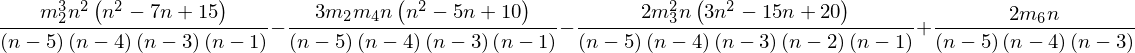

In [39]:
# Unbiased estimate of mu2**3
sum(list(map(factor, M2pow3.expand().collect(m6).collect(m2*m4).collect(m3**2).collect(m2**3).args)))

In [40]:
# two-sample #

In [34]:
m2m4 = ((n_x*m_x2 + n_y*m_y2)*(n_x*m_x4 + n_y*m_y4)).expand()
m3pow2 = ((n_x*m_x3 + n_y*m_y3)**2).expand()
m2pow3 = ((n_x*m_x2 + n_y*m_y2)**3).expand()

In [46]:
eq1xy = -m6 + (Em6.subs({n: n_x})*n_x + Em6.subs({n: n_y})*n_y)/(n_x + n_y) 
eq2xy = -m2*m4 + (m2m4.coeff(m_x2*m_x4)*Em2m4.subs(n, n_x) + m2m4.coeff(m_y2*m_y4)*Em2m4.subs(n, n_y) + m2m4.coeff(m_x4*m_y2)*Em4.subs(n, n_x)*Em2.subs(n, n_y) + m2m4.coeff(m_x2*m_y4)*Em2.subs(n, n_x)*Em4.subs(n, n_y))    /(n_x + n_y)**2 
eq3xy = -m3**2 + (m3pow2.coeff(m_x3**2)*Em3pow2.subs(n, n_x) + m3pow2.coeff(m_y3**2)*Em3pow2.subs(n, n_y) + m3pow2.coeff(m_x3*m_y3)*Em3.subs(n, n_x)*Em3.subs(n, n_y))/(n_x + n_y)**2
eq4xy = -m2**3 + (m2pow3.coeff(m_x2**3)*Em2pow3.subs(n, n_x) + m2pow3.coeff(m_y2**3)*Em2pow3.subs(n, n_y) + m2pow3.coeff(m_x2**2*m_y2)*Em2pow2.subs(n, n_x)*Em2.subs(n, n_y) + m2pow3.coeff(m_x2*m_y2**2)*Em2.subs(n, n_x)*Em2pow2.subs(n, n_y))/(n_x + n_y)**3

In [ ]:
# Do not run!
sol = solve([eq1xy.expand().collect(mu6).collect(mu2*mu4).collect(mu3**2).collect(mu2**3),
             eq2xy.expand().collect(mu6).collect(mu2*mu4).collect(mu3**2).collect(mu2**3), 
             eq3xy.expand().collect(mu6).collect(mu2*mu4).collect(mu3**2).collect(mu2**3),
             eq4xy.expand().collect(mu6).collect(mu2*mu4).collect(mu3**2).collect(mu2**3)],
            mu6, mu2*mu4, mu3**2, mu2**3)
M6two     = sol[mu6]
M2M4two   = sol[mu2*mu4]
M3pow2two = sol[mu3**2]
M2pow3two = sol[mu2**3]

In [47]:
v1mu6, v1mu2mu4, v1mu3pow2, v1mu2pow3, v2mu6, v2mu2mu4, v2mu3pow2, v2mu2pow3, v3mu6, v3mu2mu4, v3mu3pow2, v3mu2pow3, v4mu6, v4mu2mu4, v4mu3pow2, v4mu2pow3 = var('v1mu6, v1mu2mu4, v1mu3pow2, v1mu2pow3, v2mu6, v2mu2mu4, v2mu3pow2, v2mu2pow3, v3mu6, v3mu2mu4, v3mu3pow2, v3mu2pow3, v4mu6, v4mu2mu4, v4mu3pow2, v4mu2pow3')

In [48]:
e1 = eq1xy.expand()
c1mu6     = e1.coeff(mu6).factor()
c1mu2mu4  = e1.coeff(mu2*mu4).factor()
c1mu3pow2 = e1.coeff(mu3**2).factor()
c1mu2pow3 = e1.coeff(mu2**3).factor()
eq1sub = -m6 + mu6*v1mu6 + mu2*mu4*v1mu2mu4 + mu3**2*v1mu3pow2 + mu2**3*v1mu2pow3
e2 = eq2xy.expand()
c2mu6     = e2.coeff(mu6).factor()
c2mu2mu4  = e2.coeff(mu2*mu4).factor()
c2mu3pow2 = e2.coeff(mu3**2).factor()
c2mu2pow3 = e2.coeff(mu2**3).factor()
eq2sub = -m2*m4 + mu6*v2mu6 + mu2*mu4*v2mu2mu4 + mu3**2*v2mu3pow2 + mu2**3*v2mu2pow3
e3 = eq3xy.expand()
c3mu6     = e3.coeff(mu6).factor()
c3mu2mu4  = e3.coeff(mu2*mu4).factor()
c3mu3pow2 = e3.coeff(mu3**2).factor()
c3mu2pow3 = e3.coeff(mu2**3).factor()
eq3sub = -m3**2 + mu6*v3mu6 + mu2*mu4*v3mu2mu4 + mu3**2*v3mu3pow2 + mu2**3*v3mu2pow3
e4 = eq4xy.expand()
c4mu6     = e4.coeff(mu6).factor()
c4mu2mu4  = e4.coeff(mu2*mu4).factor()
c4mu3pow2 = e4.coeff(mu3**2).factor()
c4mu2pow3 = e4.coeff(mu2**3).factor()
eq4sub = -m2**3 + mu6*v4mu6 + mu2*mu4*v4mu2mu4 + mu3**2*v4mu3pow2 + mu2**3*v4mu2pow3

In [49]:
sol = solve([eq1sub, eq2sub, eq3sub, eq4sub], mu6, mu2*mu4, mu3**2, mu2**3)
M6two     = sol[mu6]
M2M4two   = sol[mu2*mu4]
M3pow2two = sol[mu3**2]
M2pow3two = sol[mu2**3]

In [50]:
M6t = M6two.subs({v1mu6: c1mu6, v1mu2mu4: c1mu2mu4, v1mu3pow2: c1mu3pow2, v1mu2pow3: c1mu2pow3, 
                 v2mu6: c2mu6, v2mu2mu4: c2mu2mu4, v2mu3pow2: c2mu3pow2, v2mu2pow3: c2mu2pow3,
                 v3mu6: c3mu6, v3mu2mu4: c3mu2mu4, v3mu3pow2: c3mu3pow2, v3mu2pow3: c3mu2pow3,
                 v4mu6: c4mu6, v4mu2mu4: c4mu2mu4, v4mu3pow2: c4mu3pow2, v4mu2pow3: c4mu2pow3})
M2M4t = M2M4two.subs({v1mu6: c1mu6, v1mu2mu4: c1mu2mu4, v1mu3pow2: c1mu3pow2, v1mu2pow3: c1mu2pow3, 
                 v2mu6: c2mu6, v2mu2mu4: c2mu2mu4, v2mu3pow2: c2mu3pow2, v2mu2pow3: c2mu2pow3,
                 v3mu6: c3mu6, v3mu2mu4: c3mu2mu4, v3mu3pow2: c3mu3pow2, v3mu2pow3: c3mu2pow3,
                 v4mu6: c4mu6, v4mu2mu4: c4mu2mu4, v4mu3pow2: c4mu3pow2, v4mu2pow3: c4mu2pow3})
M3pow2t = M3pow2two.subs({v1mu6: c1mu6, v1mu2mu4: c1mu2mu4, v1mu3pow2: c1mu3pow2, v1mu2pow3: c1mu2pow3, 
                 v2mu6: c2mu6, v2mu2mu4: c2mu2mu4, v2mu3pow2: c2mu3pow2, v2mu2pow3: c2mu2pow3,
                 v3mu6: c3mu6, v3mu2mu4: c3mu2mu4, v3mu3pow2: c3mu3pow2, v3mu2pow3: c3mu2pow3,
                 v4mu6: c4mu6, v4mu2mu4: c4mu2mu4, v4mu3pow2: c4mu3pow2, v4mu2pow3: c4mu2pow3})
M2pow3t = M2pow3two.subs({v1mu6: c1mu6, v1mu2mu4: c1mu2mu4, v1mu3pow2: c1mu3pow2, v1mu2pow3: c1mu2pow3, 
                 v2mu6: c2mu6, v2mu2mu4: c2mu2mu4, v2mu3pow2: c2mu3pow2, v2mu2pow3: c2mu2pow3,
                 v3mu6: c3mu6, v3mu2mu4: c3mu2mu4, v3mu3pow2: c3mu3pow2, v3mu2pow3: c3mu2pow3,
                 v4mu6: c4mu6, v4mu2mu4: c4mu2mu4, v4mu3pow2: c4mu3pow2, v4mu2pow3: c4mu2pow3})

In [51]:
%%capture
%save M6two     str(M6t)
%save M2M4two   str(M2M4t)
%save M3pow2two str(M3pow2t)
%save M2pow3two str(M2pow3t)